# Importación de datos

In [172]:
import pandas as pd, datetime as dt, numpy as np

In [173]:
data = pd.read_csv("data/incidentes-viales-c5-limpio.csv", sep="$", index_col=0)

In [174]:
# Conversión de datos
diccionario_de_conversion = {
    'codigo_cierre': 'category',
    'fecha_hora_creacion': 'datetime64[ns]',
    'fecha_hora_cierre': 'datetime64[ns]', 
    'delegacion_inicio': 'category',
    'incidente_c4': 'category', 
    'clas_con_f_alarma': 'category', 
    'tipo_entrada': 'category',
    'delegacion_cierre':'category',
    'mes':'category'
}
data = data.astype(diccionario_de_conversion)
data["año"] =data["fecha_hora_creacion"].dt.year
data["hora"] =data["fecha_hora_creacion"].dt.hour


## Creación de columnas de apoyo

In [175]:
data["año"] =data["fecha_hora_creacion"].dt.year
data["hora"] =data["fecha_hora_creacion"].dt.hour

In [197]:
# Creacion de columna horarios
condiciones = [(data["hora"] < 6),
              (data["hora"] >= 6) & (accidentes["hora"] < 12), 
              (data["hora"] >= 12) & (accidentes["hora"] < 18), 
              (data["hora"] >= 18)]
valores = ["madrugada", "mañana", "tarde", "noche"]

In [198]:
data["horario_accidente"] = np.select(condiciones, valores)

In [199]:
# Creación de columna de hora pico
horas_pico = ((data["hora"] >= 7) & (data["hora"] <=9)) | ((data["hora"] >= 16) & (data["hora"] <= 20))
data["is_pico"] = np.where(horas_pico, True, False)

In [200]:
data["dia"] = data["fecha_hora_creacion"].dt.weekday

In [221]:
# días festivos
festivos = [dt.datetime.strptime("2017-01-01", '%Y-%m-%d'),
           dt.datetime.strptime("2017-02-06", '%Y-%m-%d'),
           dt.datetime.strptime("2017-03-20", '%Y-%m-%d'),
           dt.datetime.strptime("2017-04-14", '%Y-%m-%d'),
           dt.datetime.strptime("2017-05-01", '%Y-%m-%d'),
           dt.datetime.strptime("2017-09-16", '%Y-%m-%d'),
           dt.datetime.strptime("2017-11-20", '%Y-%m-%d'),
           dt.datetime.strptime("2017-12-25", '%Y-%m-%d'),
           dt.datetime.strptime("2018-01-01", '%Y-%m-%d'),
           dt.datetime.strptime("2018-02-05", '%Y-%m-%d'),
           dt.datetime.strptime("2018-03-19", '%Y-%m-%d'),
           dt.datetime.strptime("2018-03-30", '%Y-%m-%d'),
           dt.datetime.strptime("2018-05-01", '%Y-%m-%d'),
           dt.datetime.strptime("2018-06-01", '%Y-%m-%d'),
           dt.datetime.strptime("2018-09-16", '%Y-%m-%d'),
           dt.datetime.strptime("2018-11-19", '%Y-%m-%d'),
           dt.datetime.strptime("2018-12-01", '%Y-%m-%d'),
           dt.datetime.strptime("2018-12-25", '%Y-%m-%d'),
           dt.datetime.strptime("2019-01-01", '%Y-%m-%d'),
           dt.datetime.strptime("2019-02-04", '%Y-%m-%d'),
           dt.datetime.strptime("2019-03-18", '%Y-%m-%d'),
           dt.datetime.strptime("2019-04-19", '%Y-%m-%d'),
           dt.datetime.strptime("2019-05-01", '%Y-%m-%d'),
           dt.datetime.strptime("2019-09-16", '%Y-%m-%d'),
           dt.datetime.strptime("2019-11-18", '%Y-%m-%d'),
           dt.datetime.strptime("2019-12-25", '%Y-%m-%d'),
           dt.datetime.strptime("2021-01-01", '%Y-%m-%d'),
           dt.datetime.strptime("2021-02-05", '%Y-%m-%d'),
           dt.datetime.strptime("2021-03-15", '%Y-%m-%d'),
           dt.datetime.strptime("2021-04-02", '%Y-%m-%d'),
           dt.datetime.strptime("2021-05-01", '%Y-%m-%d'),
           dt.datetime.strptime("2021-06-05", '%Y-%m-%d'),
           dt.datetime.strptime("2021-09-16", '%Y-%m-%d'),
           dt.datetime.strptime("2021-11-15", '%Y-%m-%d'),
           dt.datetime.strptime("2021-12-25", '%Y-%m-%d'),]

data["is_festivo"] = np.where(data["fecha_hora_creacion"].isin(festivos), True, False)

In [222]:
backup = data.copy()
data.head()

,folio,codigo_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,mes,fecha_hora_cierre,fecha_hora_creacion,año,hora,horario_accidente,is_pico,dia,is_festivo
2,C5/170622/03715,(N) La unidad de atención a emergencias fue de...,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.43053,-99.05260,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,6,2017-06-22 16:48:07,2017-06-22 13:44:52,2017,13,tarde,False,3,False
5,C5/170621/07339,(A) La unidad de atención a emergencias fue de...,IZTAPALAPA,accidente-choque sin lesionados,19.38676,-99.03350,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,6,2017-06-22 03:53:51,2017-06-21 23:29:01,2017,23,noche,False,2,False
8,C5/170622/01694,(N) La unidad de atención a emergencias fue de...,IZTAPALAPA,accidente-choque sin lesionados,19.35017,-99.07324,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,6,2017-06-22 10:47:19,2017-06-22 08:51:30,2017,8,mañana,True,3,False
9,C5/170622/03779,(N) La unidad de atención a emergencias fue de...,CUAJIMALPA,accidente-choque sin lesionados,19.37273,-99.27753,EMERGENCIA,LLAMADA DEL 911,CUAJIMALPA,6,2017-06-22 14:17:46,2017-06-22 13:49:44,2017,13,tarde,False,3,False
12,C5/170622/04693,(N) La unidad de atención a emergencias fue de...,MIGUEL HIDALGO,accidente-choque sin lesionados,19.45316,-99.19868,EMERGENCIA,LLAMADA DEL 911,MIGUEL HIDALGO,6,2017-06-22 16:47:41,2017-06-22 15:48:39,2017,15,tarde,False,3,False


In [202]:
data.columns

Index(['folio', 'codigo_cierre', 'delegacion_inicio', 'incidente_c4',
       'latitud', 'longitud', 'clas_con_f_alarma', 'tipo_entrada',
       'delegacion_cierre', 'mes', 'fecha_hora_cierre', 'fecha_hora_creacion',
       'año', 'hora', 'horario_accidente', 'is_pico', 'dia'],
      dtype='object')

# Preguntas

## 1. ¿En que épocas ocurrieron más accidentes?

In [228]:
accidentes = data[~data["codigo_cierre"].str.contains("F", regex=True)]
falsas = data[data["codigo_cierre"].str.contains("F", regex=True)]

In [204]:
accidentes.head()

,folio,codigo_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,mes,fecha_hora_cierre,fecha_hora_creacion,año,hora,horario_accidente,is_pico,dia
2,C5/170622/03715,(N) La unidad de atención a emergencias fue de...,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.43053,-99.05260,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,6,2017-06-22 16:48:07,2017-06-22 13:44:52,2017,13,tarde,False,3
5,C5/170621/07339,(A) La unidad de atención a emergencias fue de...,IZTAPALAPA,accidente-choque sin lesionados,19.38676,-99.03350,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,6,2017-06-22 03:53:51,2017-06-21 23:29:01,2017,23,noche,False,2
8,C5/170622/01694,(N) La unidad de atención a emergencias fue de...,IZTAPALAPA,accidente-choque sin lesionados,19.35017,-99.07324,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,6,2017-06-22 10:47:19,2017-06-22 08:51:30,2017,8,mañana,True,3
9,C5/170622/03779,(N) La unidad de atención a emergencias fue de...,CUAJIMALPA,accidente-choque sin lesionados,19.37273,-99.27753,EMERGENCIA,LLAMADA DEL 911,CUAJIMALPA,6,2017-06-22 14:17:46,2017-06-22 13:49:44,2017,13,tarde,False,3
12,C5/170622/04693,(N) La unidad de atención a emergencias fue de...,MIGUEL HIDALGO,accidente-choque sin lesionados,19.45316,-99.19868,EMERGENCIA,LLAMADA DEL 911,MIGUEL HIDALGO,6,2017-06-22 16:47:41,2017-06-22 15:48:39,2017,15,tarde,False,3


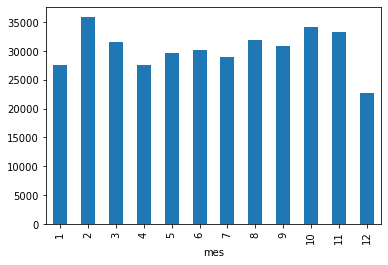

In [205]:
accidentes.groupby("mes").size().plot(kind="bar")

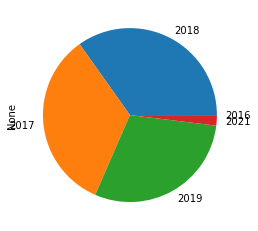

In [237]:
# Por año
accidentes.groupby("año").size().sort_values(ascending=False).plot.pie(y=" ")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022DF3872580>,
      dtype=object)

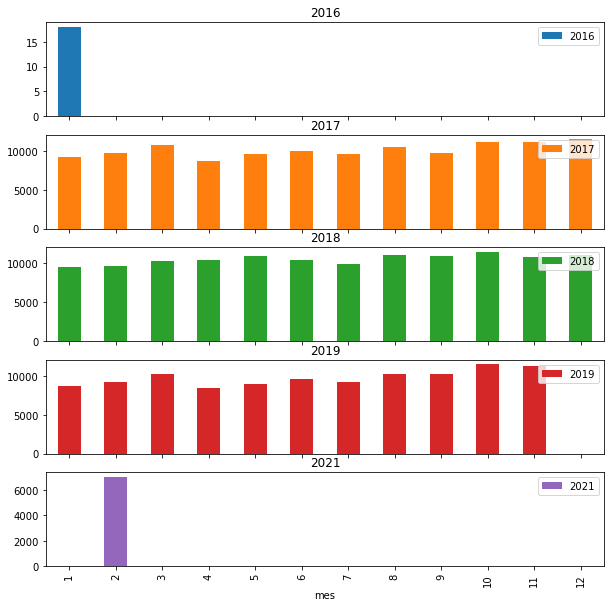

In [230]:
accidentes.groupby(["año", "mes"]).size().unstack(level=0).plot(kind='bar', subplots=True, figsize = (10,10))

# 2. ¿En qué horarios ocurren más accidentes?

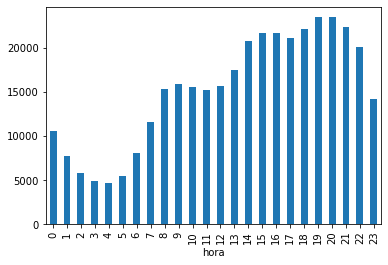

In [239]:
# Accidentes por hora
accidentes.groupby("hora").size().plot(kind="bar")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D83CAE760>,
      dtype=object)

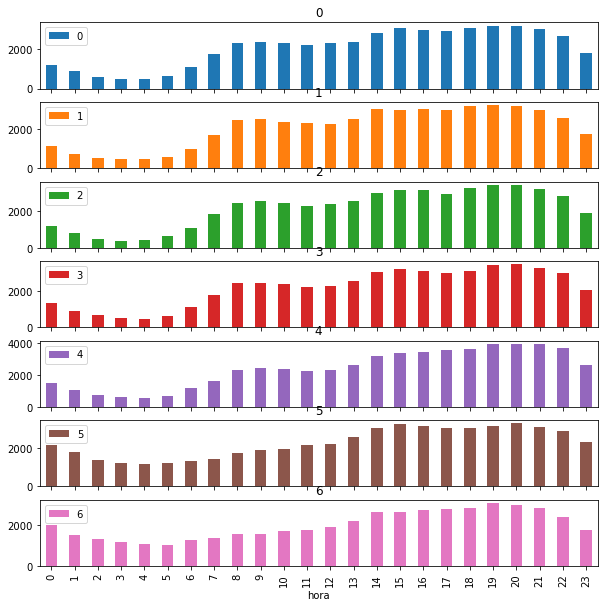

In [241]:
accidentes.groupby(["dia", "hora"]).size().unstack(level=0).plot(kind='bar', subplots=True, figsize = (10,10))

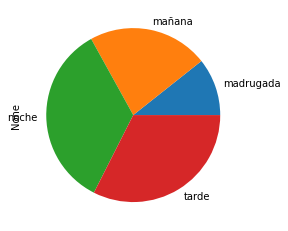

In [210]:
accidentes.groupby("horario_accidente").size().plot.pie()

Las horas pico segun [https://interactivo.eluniversal.com.mx/2017/tiempo-trafico/] son de 7:30 a 9:00 y de 16:00 a 20:00.

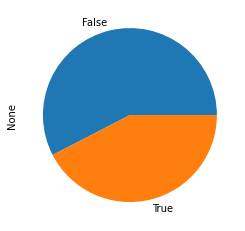

In [211]:
accidentes.groupby("is_pico").size().sort_values(ascending=False).plot.pie() 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022DB7873700>,
      dtype=object)

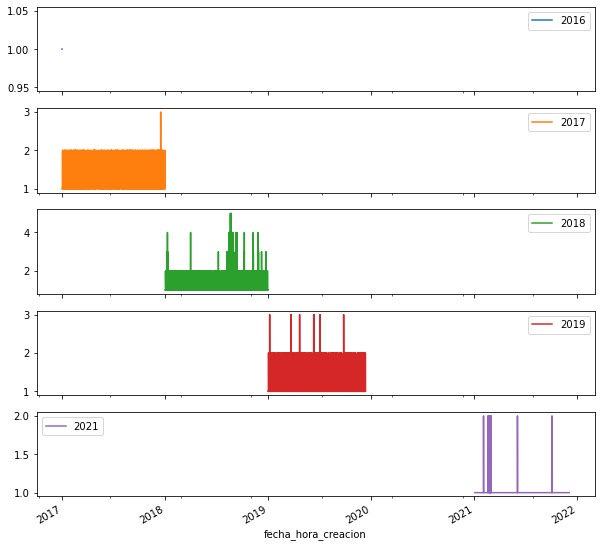

In [261]:
accidentes.groupby(["año", "fecha_hora_creacion"]).size().unstack(level=0).plot(kind='line', subplots=True, figsize = (10,10))

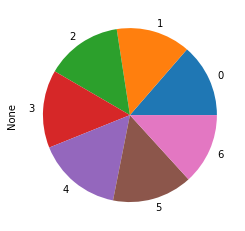

In [216]:
accidentes.groupby("dia").size().plot.pie()

In [243]:
accidentes.groupby("is_festivo").size()

is_festivo
False    364027
dtype: int64